In [131]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('Data/players_all2.csv')
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [133]:
df


,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,...,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77
0,Gonçalo Inácio CB LB CDM,21,80,87,Sporting CP\n2019 ~ 2027,257179,"185cm / 6'1""",78kg / 172lbs,Left,82,CB,7,"Jul 1, 2019",NaN,€40M,€12K,€88M,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,...,345,78,78,74+26,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN
1,K. Páez CAM CF RW,16,71,87,Independiente del Valle\n2023 ~ 2025,274559,"177cm / 5'10""",71kg / 157lbs,Left,73,CAM,16,"Jan 1, 2023",NaN,€4.7M,€500,€13.3M,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,...,294,44,56,72,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN
2,A. Grønbæk CAM CM,22,74,82,Bodø / Glimt\n2022 ~ 2028,256949,"176cm / 5'9""",65kg / 143lbs,Right,76,CAM,8,"Aug 13, 2022",NaN,€9.5M,€6K,€14.3M,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,...,336,68,64,72,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN
3,M. Tillman CAM CM LW,21,76,84,"PSV\nJun 30, 2024 On loan",256853,"187cm / 6'2""",71kg / 157lbs,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",€17M,€36K,€0,337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,...,323,58,60,72,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN
4,Sávio LM CF LW,19,80,88,"Girona\nJun 30, 2024 On loan",270409,"176cm / 5'9""",71kg / 157lbs,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",€45.5M,€7K,€0,341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,...,284,45,25,76,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,P. Brunner ST LM,17,65,87,Borussia Dortmund\n2023 ~ 2025,274126,"185cm / 6'1""",77kg / 170lbs,Right,67,ST,22,"Dec 9, 2023",NaN,€2.3M,€2K,€6.2M,298,42,72,60,61,63,274,68,63,40,39,64,334,69,68,71,59,67,311,62,...,243,48,24,62,50,59,59,68,20,28,20,43,10,7,12,8,6,1571,337,4,3,Medium,Medium,1,Normal (185+),No,68,66,NaN,66,27,59,NaN,NaN,NaN,0,NaN
3116,E. Camavinga CM CDM LB,20,83,90,Real Madrid\n2021 ~ 2029,248243,"182cm / 6'0""",68kg / 150lbs,Left,86,CM,7,"Sep 1, 2021",NaN,€71.5M,€135K,€160.9M,350,77,64,64,86,59,385,84,72,59,84,86,401,78,79,82,82,80,389,73,...,379,79,82,73,83,62,84,239,76,82,81,50,12,6,8,12,12,2193,470,3,4,High,High,3,Lean (170-185),Yes,79,67,NaN,84,78,81,NaN,Jockey Block Bruiser Technical Flair,NaN,5,NaN
3117,Moleiro LM CM CAM,19,77,87,Las Palmas\n2021 ~ 2026,264388,"172cm / 5'8""",67kg / 148lbs,Right,79,CAM,10,"Jul 1, 2021",

In [134]:
# Convert 'Weight' column to string type
df['Weight'] = df['Weight'].astype(str)

# Split by space and extract first part
df['Weight'] = df['Weight'].str.split(' ').str[0]

# Remove non-numeric characters
pattern = re.compile(r'\D+')
df['Weight'] = df['Weight'].apply(lambda x: int(pattern.sub('', x)))

In [135]:

# Convert 'Height' column to string type
df['Height'] = df['Height'].astype(str)

# Split by space and extract first part
df['Height'] = df['Height'].str.split(' ').str[0]

# Remove non-numeric characters
pattern = re.compile(r'\D+')
df['Height'] = df['Height'].apply(lambda x: int(pattern.sub('', x)))

In [136]:
# Convert 'Value' column to string type
df['Value'] = df['Value'].astype(str)

# Extract numerical values from 'Value' column
df['new_values'] = df['Value'].str[1:]

# Convert values to numeric format
new_values = []
for value in df['new_values']:
    if value:  # Check if value is not empty
        if 'M' in value:
            new_values.append(float(value.replace('M', '')) * 1000000)
        elif 'K' in value:
            new_values.append(float(value.replace('K', '')) * 1000)
        else:
            new_values.append(float(value))
    else:
        new_values.append(float('NaN'))  # If value is empty, add NaN

# Create new column with processed numerical values
df['new_values_series'] = new_values

# Display the DataFrame
df.head()



,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,...,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values,new_values_series
0,Gonçalo Inácio CB LB CDM,21,80,87,Sporting CP\n2019 ~ 2027,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,€40M,€12K,€88M,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,...,78,74+26,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40M,40000000.0
1,K. Páez CAM CF RW,16,71,87,Independiente del Valle\n2023 ~ 2025,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,€4.7M,€500,€13.3M,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,...,56,72,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4.7M,4700000.0
2,A. Grønbæk CAM CM,22,74,82,Bodø / Glimt\n2022 ~ 2028,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,€9.5M,€6K,€14.3M,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,...,64,72,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9.5M,9500000.0
3,M. Tillman CAM CM LW,21,76,84,"PSV\nJun 30, 2024 On loan",256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",€17M,€36K,€0,337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,...,60,72,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17M,17000000.0
4,Sávio LM CF LW,19,80,88,"Girona\nJun 30, 2024 On loan",270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",€45.5M,€7K,€0,341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,...,25,76,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45.5M,45500000.0


In [137]:
# Creating the 'new_wages' column
df['new_wages'] = df["Wage"].str[1:]

# Converting the 'Wage' column to string type if necessary
df['Wage'] = df['Wage'].astype(str)

# Calculating the numerical value of each wage
new_wages = []
for value in df['new_wages']:
    if value:  # Check if value is not empty
        if 'M' in value:
            new_wages.append(float(value.replace('M', '')) * 1000000)
        elif 'K' in value:
            new_wages.append(float(value.replace('K', '')) * 1000)
        else:
            new_wages.append(float(value))
    else:
        new_wages.append(0)  # Handle empty strings by assigning a default value

# Adding the calculated wages to the DataFrame
df['new_wages_series'] = new_wages
df.head()


,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values,new_values_series,new_wages,new_wages_series
0,Gonçalo Inácio CB LB CDM,21,80,87,Sporting CP\n2019 ~ 2027,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,€40M,€12K,€88M,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,...,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40M,40000000.0,12K,12000.0
1,K. Páez CAM CF RW,16,71,87,Independiente del Valle\n2023 ~ 2025,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,€4.7M,€500,€13.3M,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,...,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4.7M,4700000.0,500,500.0
2,A. Grønbæk CAM CM,22,74,82,Bodø / Glimt\n2022 ~ 2028,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,€9.5M,€6K,€14.3M,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,...,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9.5M,9500000.0,6K,6000.0
3,M. Tillman CAM CM LW,21,76,84,"PSV\nJun 30, 2024 On loan",256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",€17M,€36K,€0,337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,...,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17M,17000000.0,36K,36000.0
4,Sávio LM CF LW,19,80,88,"Girona\nJun 30, 2024 On loan",270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",€45.5M,€7K,€0,341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,...,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45.5M,45500000.0,7K,7000.0


In [138]:
for index, row in df.iterrows():
    team_contract = row["Team & Contract"]
    team = team_contract.split("\n")[0]
    df.at[index, "Team"] = team
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,...,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values,new_values_series,new_wages,new_wages_series,Team
0,Gonçalo Inácio CB LB CDM,21,80,87,Sporting CP\n2019 ~ 2027,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,€40M,€12K,€88M,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,...,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40M,40000000.0,12K,12000.0,Sporting CP
1,K. Páez CAM CF RW,16,71,87,Independiente del Valle\n2023 ~ 2025,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,€4.7M,€500,€13.3M,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,...,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4.7M,4700000.0,500,500.0,Independiente del Valle
2,A. Grønbæk CAM CM,22,74,82,Bodø / Glimt\n2022 ~ 2028,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,€9.5M,€6K,€14.3M,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,...,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9.5M,9500000.0,6K,6000.0,Bodø / Glimt
3,M. Tillman CAM CM LW,21,76,84,"PSV\nJun 30, 2024 On loan",256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",€17M,€36K,€0,337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,...,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17M,17000000.0,36K,36000.0,PSV
4,Sávio LM CF LW,19,80,88,"Girona\nJun 30, 2024 On loan",270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",€45.5M,€7K,€0,341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,...,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45.5M,45500000.0,7K,7000.0,Girona


In [139]:
df['new_release_clause'] = df["Release clause"].str[1:]

new_release_clause = []
for value in df['new_release_clause']:
    if 'M' in value:
        new_release_clause.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_release_clause.append(float(value.replace('K', '')) * 1000)
    else:
        new_release_clause.append(float(value))

        
df['new_release_clause_series'] = new_release_clause
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,...,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values,new_values_series,new_wages,new_wages_series,Team,new_release_clause,new_release_clause_series
0,Gonçalo Inácio CB LB CDM,21,80,87,Sporting CP\n2019 ~ 2027,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,€40M,€12K,€88M,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,...,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40M,40000000.0,12K,12000.0,Sporting CP,88M,88000000.0
1,K. Páez CAM CF RW,16,71,87,Independiente del Valle\n2023 ~ 2025,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,€4.7M,€500,€13.3M,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,...,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4.7M,4700000.0,500,500.0,Independiente del Valle,13.3M,13300000.0
2,A. Grønbæk CAM CM,22,74,82,Bodø / Glimt\n2022 ~ 2028,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,€9.5M,€6K,€14.3M,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,...,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9.5M,9500000.0,6K,6000.0,Bodø / Glimt,14.3M,14300000.0
3,M. Tillman CAM CM LW,21,76,84,"PSV\nJun 30, 2024 On loan",256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",€17M,€36K,€0,337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,...,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17M,17000000.0,36K,36000.0,PSV,0,0.0
4,Sávio LM CF LW,19,80,88,"Girona\nJun 30, 2024 On loan",270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",€45.5M,€7K,€0,341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,...,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45.5M,45500000.0,7K,7000.0,Girona,0,0.0


In [140]:
columns_to_drop = ["Team & Contract", "Value", "Wage", "Release clause", "new_values", "new_wages", "new_release_clause"]

df.drop(columns=columns_to_drop, inplace=True)
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,Team,new_release_clause_series
0,Gonçalo Inácio CB LB CDM,21,80,87,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,84,78,79,28,...,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40000000.0,12000.0,Sporting CP,88000000.0
1,K. Páez CAM CF RW,16,71,87,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,58,65,49,71,...,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4700000.0,500.0,Independiente del Valle,13300000.0
2,A. Grønbæk CAM CM,22,74,82,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,72,86,65,65,...,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9500000.0,6000.0,Bodø / Glimt,14300000.0
3,M. Tillman CAM CM LW,21,76,84,256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,85,62,72,65,...,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17000000.0,36000.0,PSV,0.0
4,Sávio LM CF LW,19,80,88,270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,61,73,45,67,...,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45500000.0,7000.0,Girona,0.0


In [114]:
df.eq(0).sum()

name                          0
Age                           0
Overall rating                0
Potential                     0
ID                            0
Height                        0
Weight                        0
foot                          0
Best overall                  0
Best position                 0
Growth                       36
Joined                        0
Loan date end                 0
Total attacking               0
Crossing                      0
Finishing                     0
Heading accuracy              0
Short passing                 0
Volleys                       0
Total skill                   0
Dribbling                     0
Curve                         0
FK Accuracy                   0
Long passing                  0
Ball control                  0
Total movement                0
Acceleration                  0
Sprint speed                  0
Agility                       0
Reactions                     0
Balance                       0
Total po

In [141]:
df['Growth']

0        7
1       16
2        8
3        8
4        8
        ..
3115    22
3116     7
3117    10
3118    10
3119     9
Name: Growth, Length: 3120, dtype: int64

In [142]:
df.describe()

,Age,ID,Height,Weight,Best overall,Growth,Total attacking,Total skill,Total movement,Balance,Total power,Total mentality,Total defending,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,new_release_clause_series
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,60.000000,3120.000000,3120.000000,3120.000000,0.0,3120.000000,0.0,3.120000e+03,3120.000000,3.120000e+03
mean,20.526923,252279.001923,182.511218,74.303526,80.308333,8.661859,333.536859,348.985897,388.688141,75.128526,356.363141,322.016987,153.748077,50.020192,10.008654,9.838782,10.212500,10.083654,9.876603,1953.359295,418.597115,3.461859,3.450000,1.700321,79.602244,67.899679,70.666667,78.258654,52.908013,69.280449,NaN,3.241667,NaN,4.069619e+07,57608.717949,7.656144e+07
std,3.380239,33258.704851,6.516401,6.793750,5.763240,4.611285,44.163936,43.414498,32.894556,10.081767,42.433319,36.345401,60.941733,6.112804,2.902982,2.873406,3.125776,3.042668,2.678659,155.483113,31.159358,0.740324,0.914806,1.151104,7.537390,15.394248,8.494598,6.988936,18.160788,9.027329,NaN,2.137302,NaN,4.137892e+07,69135.662188,8.334854e+07
min,16.000000,20801.000000,166.000000,60.000000,67.000000,0.000000,199.000000,214.000000,302.000000,49.000000,244.000000,223.000000,44.000000,35.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1459.000000,322.000000,2.000000,2.000000,1.000000,64.000000,23.000000,46.000000,56.000000,20.000000,50.000000,NaN,0.000000,NaN,2.000000e+06,500.000000,0.000000e+00
25%,18.000000,245367.000000,178.000000,70.000000,77.000000,5.000000,308.000000,331.000000,368.000000,68.000000,324.000000,294.000000,92.000000,46.000000,7.000000,7.000000,7.000000,7.000000,8.000000,1857.000000,399.000000,3.000000,3.000000,1.000000,75.000000,60.000000,65.000000,75.000000,36.000000,63.000000,NaN,1.000000,NaN,1.350000e+07,12000.000000,1.430000e+07
50%,20.000000,256949.000000,182.000000,74.000000,80.000000,8.000000,340.000000,351.000000,392.000000,76.000000,355.000000,325.000000,155.000000,50.000000,10.000000,10.000000,11.000000,10.000000,10.000000,1963.000000,420.000000,3.000000,3.000000,1.000000,79.000000,73.000000,71.500000,79.000000,51.000000,69.000000,NaN,3.000000,NaN,3.050000e+07,36000.000000,5.600000e+07
75%,22.000000,269087.000000,187.000000,77.000000,84.000000,11.000000,359.000000,381.250000,411.000000,84.000000,388.000000,346.000000,214.500000,54.000000,13.000000,12.000000,13.000000,13.000000,12.000000,2065.000000,438.000000,4.000000,4.000000,2.000000,85.000000,78.000000,76.250000,83.000000,70.000000,75.000000,NaN,5.000000,NaN,4.600000e+07,77000.000000,8.920000e+07
max,38.000000,279709.000000,195.000000,94.000000,93.000000,22.000000,415.000000,435.000000,462.000000,95.000000,442.000000,416.000000,259.000000,63.000000,15.000000,15.000000,15.000000,15.000000,15.000000,2295.000000,492.000000,5.000000,5.000000,5.000000,97.000000,93.000000,89.000000,92.000000,86.000000,90.000000,NaN,7.000000,NaN,1.850000e+08,340000.000000,3.561000e+08


In [143]:
df.nlargest(5,columns="new_values_series")

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,Team,new_release_clause_series
1137,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0
1197,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0
1257,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0
1316,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0
1374,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0


In [144]:
df = df.drop_duplicates()


In [145]:
df.nlargest(5,columns="new_values_series")

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,Team,new_release_clause_series
1137,E. Haaland ST,22,91,94,239085,195,94,Left,93,ST,3,"Jul 1, 2022",NaN,393,47,96,83,77,90,363,79,77,62,63,82,420,82,94,78,94,72,442,94,93,76,93,86,...,74,86,87,114,38,47,29,52,7,14,13,11,7,2170,464,3,3,High,High,5,Unique,Yes,89,93,NaN,81,45,88,NaN,Power Header Quick Step,Acrobatic +,3,NaN,185000000.0,340000.0,Manchester City,356100000.0
18,K. Mbappé ST LW,24,91,94,231747,182,75,Right,93,ST,3,"Jul 1, 2018",NaN,415,78,94,73,86,84,405,93,80,69,71,92,462,97,97,93,93,82,426,90,88,88,77,83,...,83,84,88,92,26,34,32,42,13,5,7,11,6,2204,473,4,5,High,Low,5,Unique,Yes,97,90,80.0,92,36,78,NaN,Finesse Shot Rapid Flair Trivela Acrobatic,Quick Step +,6,NaN,181500000.0,230000.0,Paris Saint Germain,349400000.0
77,K. Mbappé ST LW,24,91,94,231747,182,75,Right,93,ST,3,"Jul 1, 2018",NaN,415,78,94,73,86,84,405,93,80,69,71,92,462,97,97,93,93,82,426,90,88,88,77,83,...,83,84,88,92,26,34,32,42,13,5,7,11,6,2204,473,4,5,High,Low,5,Unique,Yes,97,90,NaN,92,36,78,NaN,Finesse Shot Rapid Flair Trivela Acrobatic,Quick Step +,6,NaN,181500000.0,230000.0,Paris Saint Germain,349400000.0
34,Vini Jr. LW ST,22,89,94,238794,176,73,Right,90,CAM,5,"Jul 12, 2018",NaN,373,79,89,50,82,73,400,92,79,62,77,90,454,95,95,94,86,84,380,77,74,84,65,80,...,83,71+2,83,75,32,25,18,36,5,7,7,7,10,2043,446,4,5,High,Medium,5,Lean (170-185),Yes,95,83,80.0,90,29,69,NaN,Finesse Shot Chip Shot Rapid Flair First Touch...,Quick Step +,7,NaN,158500000.0,310000.0,Real Madrid,336800000.0
95,Vini Jr. LW ST,22,89,94,238794,176,73,Right,90,CAM,5,"Jul 12, 2018",NaN,373,79,89,50,82,73,400,92,79,62,77,90,454,95,95,94,86,84,380,77,74,84,65,80,...,83,71+2,83,75,32,25,18,36,5,7,7,7,10,2043,446,4,5,High,Medium,5,Lean (170-185),Yes,95,83,NaN,90,29,69,NaN,Finesse Shot Chip Shot Rapid Flair First Touch...,Quick Step +,7,NaN,158500000.0,310000.0,Real Madrid,336800000.0


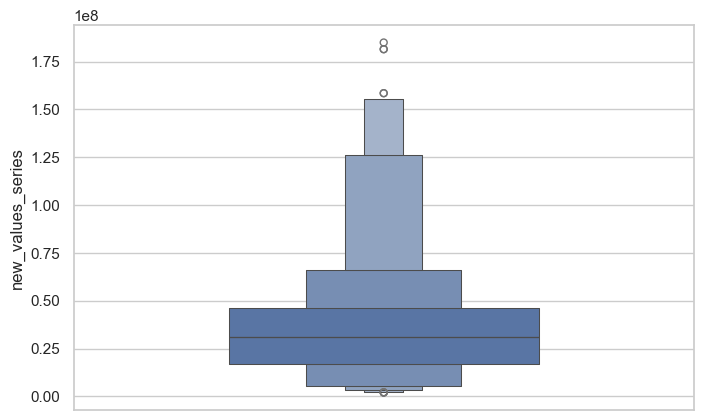

In [146]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='new_values_series', data=df, width=0.5)
plt.show()

C:\Users\rosha\AppData\Local\Temp\ipykernel_14300\2970051373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')


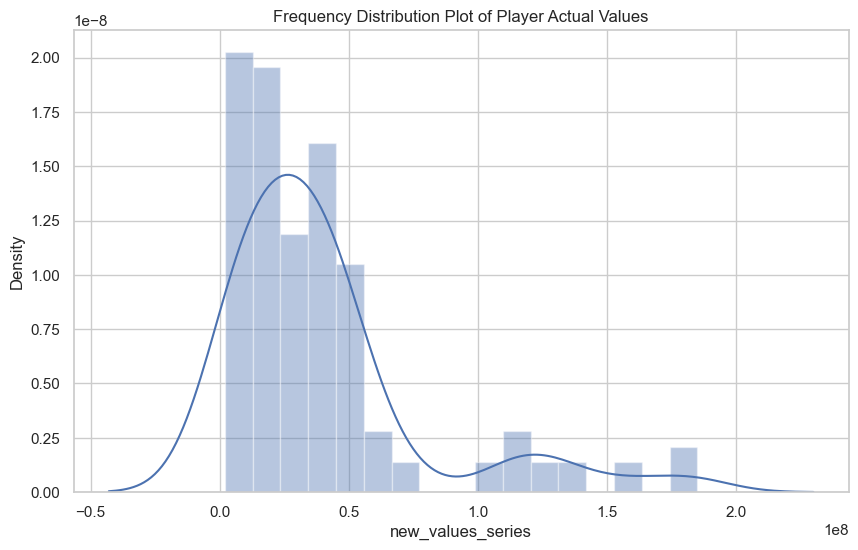

In [147]:
x = df.new_values_series
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

In [148]:
df


,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,Team,new_release_clause_series
0,Gonçalo Inácio CB LB CDM,21,80,87,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,84,78,79,28,...,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40000000.0,12000.0,Sporting CP,88000000.0
1,K. Páez CAM CF RW,16,71,87,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,58,65,49,71,...,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4700000.0,500.0,Independiente del Valle,13300000.0
2,A. Grønbæk CAM CM,22,74,82,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,72,86,65,65,...,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9500000.0,6000.0,Bodø / Glimt,14300000.0
3,M. Tillman CAM CM LW,21,76,84,256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,85,62,72,65,...,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17000000.0,36000.0,PSV,0.0
4,Sávio LM CF LW,19,80,88,270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,61,73,45,67,...,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45500000.0,7000.0,Girona,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,Vitinha CM,23,83,87,255253,172,64,Right,85,CAM,4,"Jun 30, 2022",NaN,340,74,76+2,42,86,62,393,87,74,62,83,87,405,75,69,90,83+1,88,359,76,61,81,59,82+4,...,83+2,73,84,218,74,76+1,68,43,12,13,8,5,5,2146,456,3,3,High,High,2,Lean (170-185),Yes,72,76,NaN,87,72,68,NaN,Finesse Shot Intercept Technical,NaN,3,NaN,52000000.0,90000.0,Paris Saint Germain,100100000.0
2039,B. Barcola LW RW,20,79,86,264652,186,70,Right,80,LW,7,"Aug 31, 2023",NaN,371,73,77,69,79,73,353,80,73,59,63,78,395,84,87,84,76,64,346,74,76,68,59,69,...,78,66,78,90,25,37,28,43,8,8,15,6,6,1910,409,3,3,High,Medium,1,Lean (185+),No,86,74,NaN,79,34,62,NaN,Rapid,NaN,1,NaN,35000000.0,65000.0,Paris Saint Germain,71800000.0
2399,Gabri Veiga CM CAM,21,78,87,258729,184,71,Right,80,CAM,9,"Aug 26, 2023",NaN,312,55,80,52,80,45,356,80,56,60,78,82,360,73,74,72,76,65,362,77,67,71,65,82,...,76,60,68,172,41,71,60,55,13,14,13,6,9,1956,425,4,3,Medium,Medium,2,Lean (170-185),Yes,74,77,NaN,78,60,64,NaN,NaN,NaN,0,NaN,31500000.0,28000.0,Al Ahli Jeddah,59900

In [149]:
data_type = df['Overall rating'].dtype

print("Data type of 'Overall rating' column:", data_type)

Data type of 'Overall rating' column: object


In [151]:
print(df["Overall rating"].dtype)


object


C:\Users\rosha\AppData\Local\Temp\ipykernel_14300\2890710824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Overall rating"] = pd.to_numeric(df["Overall rating"], errors='coerce')


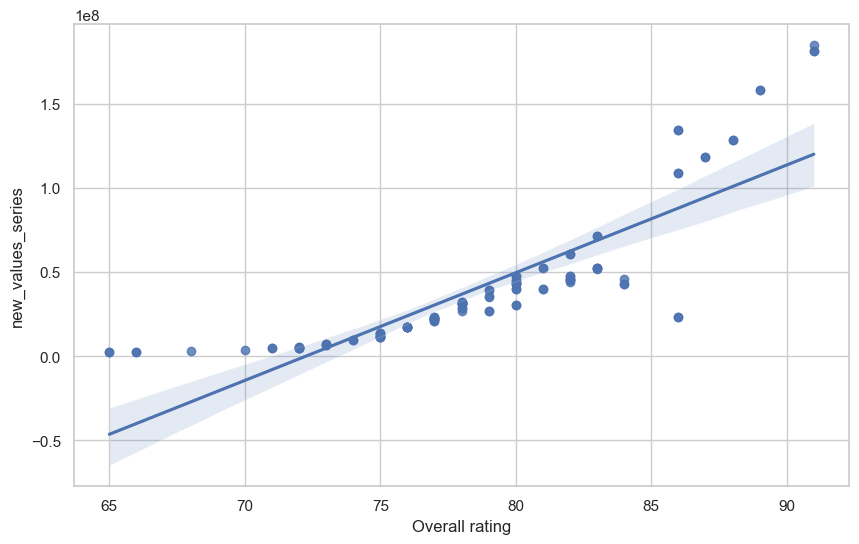

In [152]:
df["Overall rating"] = pd.to_numeric(df["Overall rating"], errors='coerce')

# Plot the regression plot again
plt.figure(figsize=(10, 6))
sns.regplot(x="Overall rating", y="new_values_series", data=df)
plt.show()

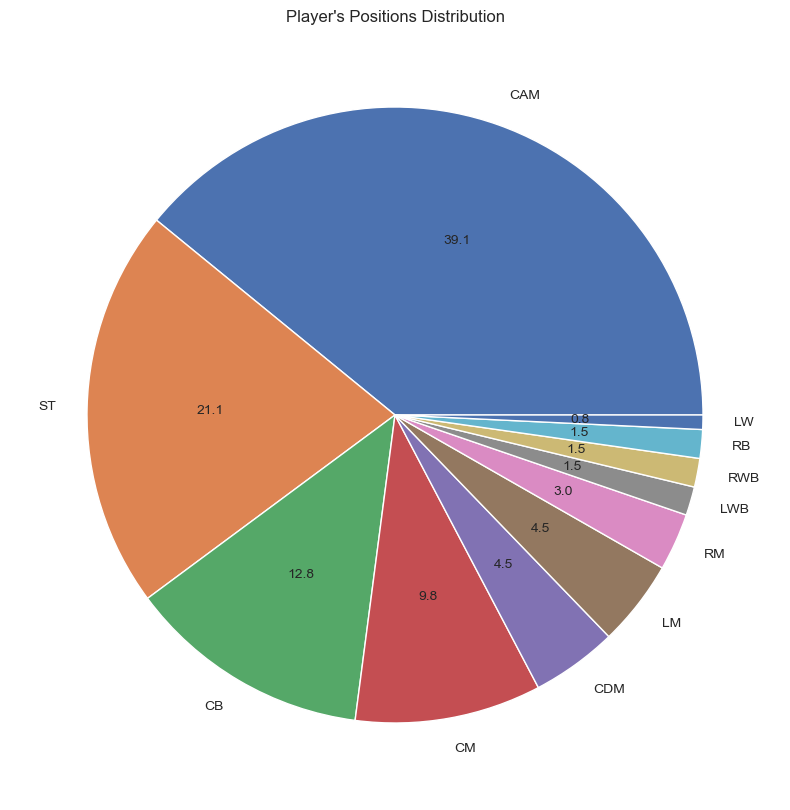

In [153]:
plt.figure(figsize=(10,10))
loc=df['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

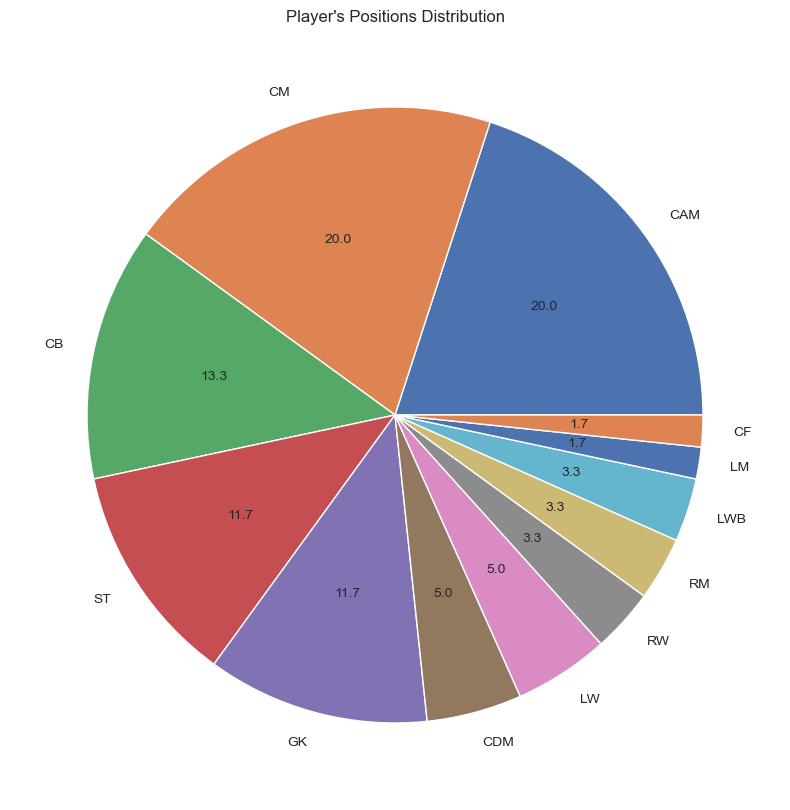

In [127]:
plt.figure(figsize=(10,10))
loc=df['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

C:\Users\rosha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

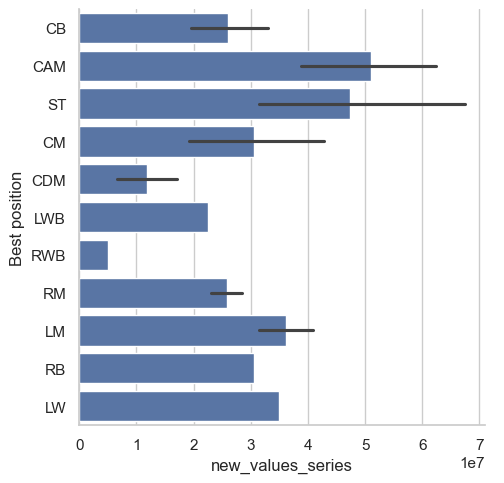

In [154]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Best position", x="new_values_series", kind="bar",  data=df)
plt.show()

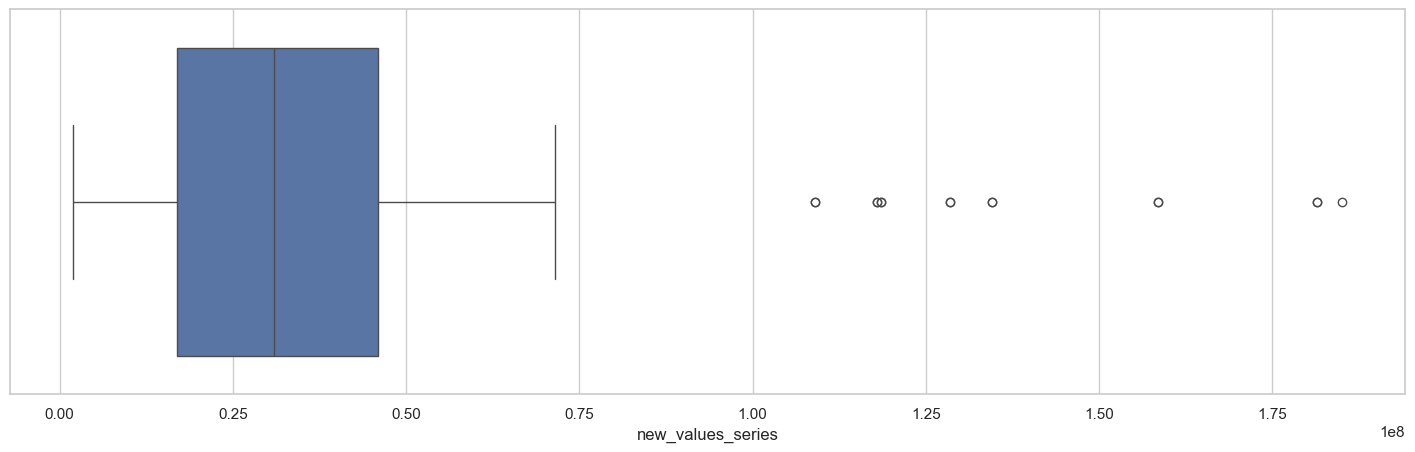

In [155]:


plt.figure(figsize=[18,5])
sns.boxplot(x=df['new_values_series'], data=df);



In [156]:
df


,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Joined,Loan date end,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,...,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,Weak foot,Skill moves,Attacking work rate,Defensive work rate,International reputation,Body type,Real face,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Traits,PlayStyles,PlayStyles +,Number of playstyles,Unnamed: 77,new_values_series,new_wages_series,Team,new_release_clause_series
0,Gonçalo Inácio CB LB CDM,21,80.0,87,257179,185,78,Left,82,CB,7,"Jul 1, 2019",NaN,261,30,23,84+2,79,45,283,69+6,29,27,85+3,73,364,78,81,73,77,55,336,67,84,78,79,28,...,75,40,75,243,82,82,79,36,6,6,7,10,7,1868,412,2,2,Medium,High,1,Normal (185+),No,80,37,64.0,71,81,79,NaN,Pinged Pass Long Ball Pass Intercept Aerial,NaN,4,NaN,40000000.0,12000.0,Sporting CP,88000000.0
1,K. Páez CAM CF RW,16,71.0,87,274559,177,71,Left,73,CAM,16,"Jan 1, 2023",NaN,295,61,68,48,74,44,343,73,73,60,66,71,374,77,81,82,59,75,308,65,58,65,49,71,...,71,51,52,117,34,42,41,51,10,11,9,15,6,1782,381,3,4,Medium,Medium,1,Lean (170-185),No,79,66,69.0,72,43,52,NaN,Pinged Pass Technical First Touch Trickster,NaN,4,NaN,4700000.0,500.0,Independiente del Valle,13300000.0
2,A. Grønbæk CAM CM,22,74.0,82,256949,176,65,Right,76,CAM,8,"Aug 13, 2022",NaN,327,68,70,55,73,61,351,75,69,62,70,75,392,78,76,85,69,84,355,67,72,86,65,65,...,76,56,76,188,62,64,62,48,8,12,13,6,9,1997,424,3,4,High,Medium,1,Normal (170-185),No,77,67,71.0,76,62,71,NaN,Incisive Pass Technical Flair,NaN,3,NaN,9500000.0,6000.0,Bodø / Glimt,14300000.0
3,M. Tillman CAM CM LW,21,76.0,84,256853,187,71,Right,78,CAM,8,"Aug 22, 2021","Jun 30, 2024",337,64,70,73,77,53,335,79,68,41,69,78,398,82,76,78,74,88,355,71,85,62,72,65,...,77,56,74,176,55,67,54,52,9,11,11,12,9,1976,425,3,4,High,Medium,1,Normal (185+),No,79,68,71.0,79,61,67,NaN,Power Shot Incisive Pass Technical Flair First...,NaN,6,NaN,17000000.0,36000.0,PSV,0.0
4,Sávio LM CF LW,19,80.0,88,270409,176,71,Left,81,CAM,8,"Jul 1, 2022","Jun 30, 2024",341,80,76,45,77,63,368,86,78,55,67,82,412,88,87,88,73,76,315,69,61,73,45,67,...,76,62,70,92,26,30,36,50,9,12,8,9,12,1862,399,2,4,High,Low,1,Lean (170-185),No,87,71,75.0,83,30,53,NaN,Technical,NaN,1,NaN,45500000.0,7000.0,Girona,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,Vitinha CM,23,83.0,87,255253,172,64,Right,85,CAM,4,"Jun 30, 2022",NaN,340,74,76+2,42,86,62,393,87,74,62,83,87,405,75,69,90,83+1,88,359,76,61,81,59,82+4,...,83+2,73,84,218,74,76+1,68,43,12,13,8,5,5,2146,456,3,3,High,High,2,Lean (170-185),Yes,72,76,NaN,87,72,68,NaN,Finesse Shot Intercept Technical,NaN,3,NaN,52000000.0,90000.0,Paris Saint Germain,100100000.0
2039,B. Barcola LW RW,20,79.0,86,264652,186,70,Right,80,LW,7,"Aug 31, 2023",NaN,371,73,77,69,79,73,353,80,73,59,63,78,395,84,87,84,76,64,346,74,76,68,59,69,...,78,66,78,90,25,37,28,43,8,8,15,6,6,1910,409,3,3,High,Medium,1,Lean (185+),No,86,74,NaN,79,34,62,NaN,Rapid,NaN,1,NaN,35000000.0,65000.0,Paris Saint Germain,71800000.0
2399,Gabri Veiga CM CAM,21,78.0,87,258729,184,71,Right,80,CAM,9,"Aug 26, 2023",NaN,312,55,80,52,80,45,356,80,56,60,78,82,360,73,74,72,76,65,362,77,67,71,65,82,...,76,60,68,172,41,71,60,55,13,14,13,6,9,1956,425,4,3,Medium,Medium,2,Lean (170-185),Yes,74,77,NaN,78,60,64,NaN,NaN,NaN,0,NaN,31500000.0,28000.0,Al A

In [157]:
df = df.drop(['ID'], axis=1)


In [159]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)


Index(['Age', 'Overall rating', 'Height', 'Weight', 'Best overall', 'Growth',
       'Total attacking', 'Total skill', 'Total movement', 'Balance',
       'Total power', 'Total mentality', 'Total defending',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total stats', 'Base stats',
       'Weak foot', 'Skill moves', 'International reputation', 'Pace / Diving',
       'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
       'Defending / Pace', 'Physical / Positioning', 'Traits',
       'Number of playstyles', 'Unnamed: 77', 'new_values_series',
       'new_wages_series', 'new_release_clause_series'],
      dtype='object')


In [162]:
# Select the columns of interest
columns_of_interest = ['Age', 'Overall rating', 'Height', 'Weight', 'Best overall', 'Growth',
                       'Total attacking', 'Total skill', 'Total movement', 'Balance',
                       'Total power', 'Total mentality', 'Total defending',
                       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
                       'GK Positioning', 'GK Reflexes', 'Total stats', 'Base stats',
                       'Weak foot', 'Skill moves', 'International reputation', 'Pace / Diving',
                       'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                       'Defending / Pace', 'Physical / Positioning', 'Traits',
                       'Number of playstyles', 'Unnamed: 77', 'new_values_series',
                       'new_wages_series', 'new_release_clause_series']

# Subset the DataFrame with the selected columns
selected_df = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()



In [163]:
correlation_with_target = correlation_matrix['new_values_series']

In [164]:
correlation_with_target

Age                          0.306288
Overall rating               0.846165
Height                       0.020111
Weight                       0.011317
Best overall                 0.836730
Growth                      -0.586539
Total attacking              0.572804
Total skill                  0.531114
Total movement               0.596173
Balance                      0.257588
Total power                  0.489828
Total mentality              0.511809
Total defending             -0.127997
Total goalkeeping           -0.151869
GK Diving                    0.014270
GK Handling                  0.038760
GK Kicking                  -0.129532
GK Positioning              -0.148987
GK Reflexes                 -0.088719
Total stats                  0.629464
Base stats                   0.668035
Weak foot                    0.162188
Skill moves                  0.480857
International reputation     0.782661
Pace / Diving                0.474572
Shooting / Handling          0.491199
Passing / Ki

In [165]:
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Create a list of tuples with variable name and correlation value pairs
sorted_correlation_list = [(variable, correlation) for variable, correlation in sorted_correlation.items()]

# Display the sorted correlation values and names
print("Sorted correlation values and names:")
for variable, correlation in sorted_correlation_list:
    print(f"{variable}: {correlation}")

Sorted correlation values and names:
new_values_series: 1.0
new_release_clause_series: 0.9624149606802636
Overall rating: 0.8461650250154035
new_wages_series: 0.8375886328708337
Best overall: 0.8367302892390145
International reputation: 0.7826605550192012
Base stats: 0.6680354418027689
Dribbling / Reflexes: 0.6636705077508513
Total stats: 0.6294636749982814
Passing / Kicking: 0.6010869028837083
Total movement: 0.5961729306604489
Total attacking: 0.5728035842230319
Total skill: 0.5311136166799043
Number of playstyles: 0.5168809562394131
Total mentality: 0.5118085100006275
Shooting / Handling: 0.4911988295997887
Total power: 0.4898284209642428
Skill moves: 0.48085656478850464
Pace / Diving: 0.47457225764693517
Age: 0.3062884559428298
Balance: 0.2575881647126501
Physical / Positioning: 0.24639068355142463
Weak foot: 0.16218775100626473
GK Handling: 0.038759922312797304
Height: 0.0201109823699391
GK Diving: 0.0142704186364024
Weight: 0.01131680550843299
GK Reflexes: -0.0887190197189829
Def